In [22]:
import networkx as nx
import numpy as np
import uuid
from gqlalchemy import Memgraph
from gqlalchemy.transformations.translators.nx_translator import NxTranslator

In [23]:
memgraph = Memgraph()

## Generate Test Data

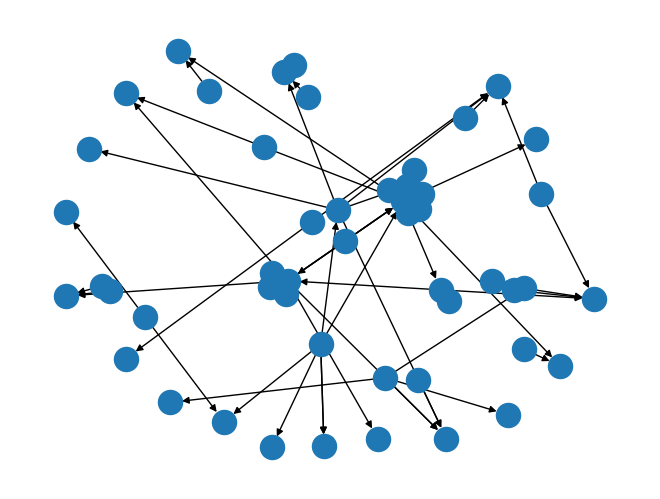

In [45]:
def export_nx_to_memgraph(g:nx.Graph, db:Memgraph):
    translator = NxTranslator()
    for query in list(translator.to_cypher_queries(g)):
        db.execute(query)

def get_new_test_digraph(num_nodes:int=50):
    test_graph = nx.scale_free_graph(n=num_nodes, seed=0, alpha=0.5, beta=0.2, gamma=0.3)

    # append node properties
    nx.set_node_attributes(test_graph, dict(test_graph.degree()), name='degree')
    nx.set_node_attributes(test_graph, nx.betweenness_centrality(test_graph), name='betweenness_centrality')

    for node, data in test_graph.nodes(data=True):
            
        data['node_type'] = 0 if node < 25 else 1

        data['node_identifier'] = str(uuid.uuid4())
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
        data['feature3'] = 1 if np.random.random() > 0.5 else 0

    # append edge properties
    for _, _, data in test_graph.edges(data=True):
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
        
    return test_graph

test_graph = get_new_test_digraph()
nx.draw(test_graph)

## Export data into DB

In [48]:
memgraph.drop_database()
export_nx_to_memgraph(test_graph, memgraph)